### Using all 8 stations with a P record from 2005-2016: 
### Fisera Ridge, Upper Clearing, Hay Meadow
### Kananaskis, Bow Valley, Kananaskis Pocaterra, Banff CS, Wildcat Hills
### Remove days with P<1mm
### Plot histograms and best fit probability distributions for wet days

In [1]:
import numpy as np
import pandas as pd
import math
from scipy import stats
from sklearn.linear_model import LinearRegression
import scipy
# import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

### Read in precip data for all stations

### Fisera Ridge 2325 m, Upper Clearing 1845 m, Hay Meadow 1436 m

In [2]:
# Use pd.read_csv to read csv file
# Fisera Ridge
FRP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Version 02\Meteorology\Recent_modelling_data\time_series_inputs\FRdailyprecip.csv", 
                            header=None, names= ["date", "FR_p_mm"])
FRP_df.set_index("date", inplace=True)

# Upper Clearing
UCP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Version 02\Meteorology\Recent_modelling_data\time_series_inputs\UCdailyprecip.csv", 
                            header=None, names= ["date", "UC_p_mm"])
UCP_df.set_index("date", inplace=True)

# Hay Meadow
HMP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Version 02\Meteorology\Recent_modelling_data\time_series_inputs\HMdailyprecip.csv", 
                            header=None, names= ["date", "HM_p_mm"])
HMP_df.set_index("date", inplace=True)

# drop P values less than 1.0mm
FRP_df = FRP_df.drop(FRP_df[FRP_df.FR_p_mm < 1.0].index)
UCP_df = UCP_df.drop(UCP_df[UCP_df.UC_p_mm < 1.0].index)
HMP_df = HMP_df.drop(HMP_df[HMP_df.HM_p_mm < 1.0].index)

### Kananaskis 1391.1 m

In [3]:
# Use pd.read_csv to read csv file
KP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Kananaskis\en_climate_daily_AB_3053600_2005-2016_P1D.csv", 
                               header=[0])
KP_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'K_p_mm'}, inplace=True) # rename date column
KP_df.set_index("date", inplace=True)
# change datetime format to YMD
KP_df.index = pd.to_datetime(KP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
KP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
KP_df["K_p_mm"] = KP_df["K_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
KP_df.drop(KP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
KP_df.drop(KP_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# drop P values less than 1.0mm
KP_df = KP_df.drop(KP_df[KP_df.K_p_mm < 1.0].index)

### Bow Valley 1297.5 m

In [4]:
# Use pd.read_csv to read csv file
BVP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Bow_Valley\en_climate_daily_AB_3050778_2005-2016_P1D.csv", 
                               header=[0])
BVP_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'BV_p_mm'}, inplace=True) # rename date column
BVP_df.set_index("date", inplace=True)
# change datetime format to YMD
BVP_df.index = pd.to_datetime(BVP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
BVP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
BVP_df["BV_p_mm"] = BVP_df["BV_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
BVP_df.drop(BVP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# need to drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
BVP_df.drop(BVP_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# drop P values less than 1.0mm
BVP_df = BVP_df.drop(BVP_df[BVP_df.BV_p_mm < 1.0].index)

### Kananaskis Pocaterra 1610.0 m

In [5]:
# Use pd.read_csv to read csv file
KPP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Kananaskis_Pocaterra\en_climate_daily_AB_3053604_2005-2016_P1D.csv", 
                               header=[0])
KPP_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'KP_p_mm'}, inplace=True) # rename date column
KPP_df.set_index("date", inplace=True)
# change datetime format to YMD
KPP_df.index = pd.to_datetime(KPP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
KPP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
KPP_df["KP_p_mm"] = KPP_df["KP_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
KPP_df.drop(KPP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# need to drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
KPP_df.drop(KPP_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# drop P values less than 1.0mm
KPP_df = KPP_df.drop(KPP_df[KPP_df.KP_p_mm < 1.0].index)

### Banff CS 1396.9 m

In [6]:
# Use pd.read_csv to read csv file
BCSP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Banff_CS\en_climate_daily_AB_3050519_2005-2016_P1D.csv", 
                               header=[0])
BCSP_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'BCS_p_mm'}, inplace=True) # rename date column
BCSP_df.set_index("date", inplace=True)
# change datetime format to YMD
BCSP_df.index = pd.to_datetime(BCSP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
BCSP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
BCSP_df["BCS_p_mm"] = BCSP_df["BCS_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
BCSP_df.drop(BCSP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
BCSP_df.drop(BCSP_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# drop P values less than 1.0mm
BCSP_df = BCSP_df.drop(BCSP_df[BCSP_df.BCS_p_mm < 1.0].index)

### Wildcat Hills 1268.0 m

In [7]:
# Use pd.read_csv to read csv file
WHP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Wild_Cat_Hills\en_climate_daily_AB_3037550_2005-2016_P1D.csv", 
                               header=[0])
WHP_df.rename(columns={'Date/Time':'date', 'Total Precip (mm)':'WH_p_mm'}, inplace=True) # rename date column
WHP_df.set_index("date", inplace=True)
# change datetime format to YMD
WHP_df.index = pd.to_datetime(WHP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
WHP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
WHP_df["WH_p_mm"] = WHP_df["WH_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
WHP_df.drop(WHP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
WHP_df.drop(WHP_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# drop P values less than 1.0mm
WHP_df = WHP_df.drop(WHP_df[WHP_df.WH_p_mm < 1.0].index)

### Calculate mean wet day precipitation values

In [8]:
print(FRP_df.mean())
print(UCP_df.mean())
print(HMP_df.mean())
print(KP_df.mean())
print(BVP_df.mean())
print(KPP_df.mean())
print(BCSP_df.mean())
print(WHP_df.mean())

FR_p_mm    7.741585
dtype: float64
UC_p_mm    6.513763
dtype: float64
HM_p_mm    6.226008
dtype: float64
K_p_mm    7.418306
dtype: float64
BV_p_mm    5.97339
dtype: float64
KP_p_mm    5.283155
dtype: float64
BCS_p_mm    4.546531
dtype: float64
WH_p_mm    5.758977
dtype: float64


### Scale P values by dividing by the mean wet day P for each station

In [9]:
FRP_df['FR_pscaled_mm'] = (FRP_df['FR_p_mm'] / 7.741585).round(3)
UCP_df['UC_pscaled_mm'] = (UCP_df['UC_p_mm'] / 6.513763).round(3)
HMP_df['HM_pscaled_mm'] = (HMP_df['HM_p_mm'] / 6.226008).round(3)
KP_df['K_pscaled_mm'] = (KP_df['K_p_mm'] / 7.418306).round(3)
BVP_df['BV_pscaled_mm'] = (BVP_df['BV_p_mm'] / 5.97339).round(3)
KPP_df['KP_pscaled_mm'] = (KPP_df['KP_p_mm'] / 5.283155).round(3)
BCSP_df['BCS_pscaled_mm'] = (BCSP_df['BCS_p_mm'] / 4.546531).round(3)
WHP_df['WH_pscaled_mm'] = (WHP_df['WH_p_mm'] / 5.758977).round(3)
# UCP_df

In [34]:
# check how many wet days there are at each station (from highest elev to lowest)
print("FR wet days (2325 m) =", len(FRP_df))
print("UC wet days (1845 m) =", len(UCP_df))
print("KP wet days (1610 m) =", len(KPP_df))
print("HM wet days (1436 m) =", len(HMP_df))
print("BCS wet days (1397 m) =", len(BCSP_df))
print("K wet days (1391 m) =", len(KP_df))
print("BV wet days (1298 m) =", len(BVP_df))
print("WH wet days (1268 m) =", len(WHP_df))

FR wet days (2325 m) = 1482
UC wet days (1845 m) = 1129
KP wet days (1610 m) = 653
HM wet days (1436 m) = 916
BCS wet days (1397 m) = 980
K wet days (1391 m) = 1027
BV wet days (1298 m) = 947
WH wet days (1268 m) = 919


### Plot histogram and probability distributions for wet days at each station in descending order of elevation

### Fisera Ridge 2325 m, 1482 wet days, mean wet day P = 7.74 mm

Text(0.5, 1.0, 'Fisera Ridge 2325 m (2005-2016)')

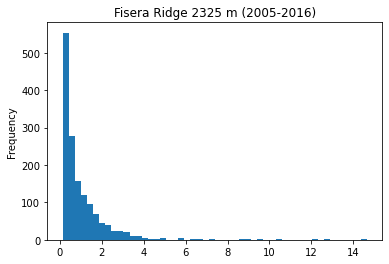

In [33]:
FRP_df.FR_pscaled_mm.plot(kind='hist', bins=50)
plt.title('Fisera Ridge 2325 m (2005-2016)')

gamma: (0.2771023386069672, 0.12899999999999998, 1.5719173668516309)
exponential: (0.129, 0.8710094466936573)


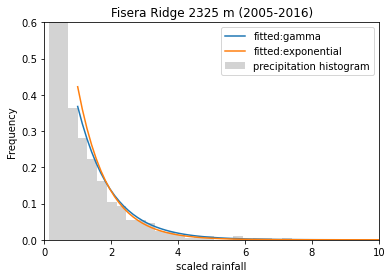

In [128]:
# fit distributions
x = np.linspace(1, max(FRP_df.FR_pscaled_mm), 100)
y = FRP_df.FR_pscaled_mm
FRP_df.FR_pscaled_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma
param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=1, scale=1) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')
# fit exp
param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')
# set up plot
plt.xlabel('scaled rainfall')
plt.xlim(0, 10)
plt.ylim(0, 0.6)
plt.legend()
plt.title('Fisera Ridge 2325 m (2005-2016)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_scaled_plots_2005-16\FRscaledprob_1mm.png')

### Upper Clearing 1845 m, 1129 wet days, mean wet day P = 6.51 mm

Text(0.5, 1.0, 'Upper Clearing 1845 m (2005-2016)')

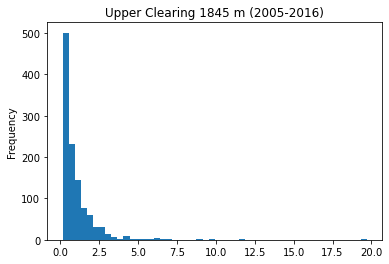

In [16]:
UCP_df.UC_pscaled_mm.plot(kind='hist', bins=50)
plt.title('Upper Clearing 1845 m (2005-2016)')

gamma: (0.16840175846125577, 0.15399999999999997, 1.5740556811966169)
exponential: (0.154, 0.8460106288751109)


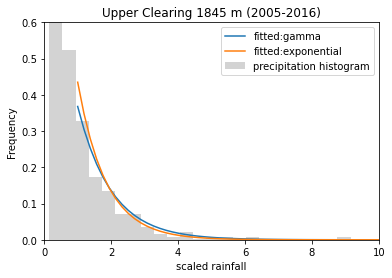

In [121]:
# fit distributions
x = np.linspace(1, max(UCP_df.UC_pscaled_mm), 100)
y = UCP_df.UC_pscaled_mm
UCP_df.UC_pscaled_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma
param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=1, scale=1) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')
# fit exp
param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')
plt.xlabel('scaled rainfall')
plt.xlim(0, 10)
plt.ylim(0, 0.6)
plt.legend()
plt.title('Upper Clearing 1845 m (2005-2016)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_scaled_plots_2005-16\UCscaledprob_1mm.png')

### Kananskis Pocaterra 1610 m, 653 wet days, mean wet day P = 5.28 mm

Text(0.5, 1.0, 'Kananskis Pocaterra 1610 m (2005-2016)')

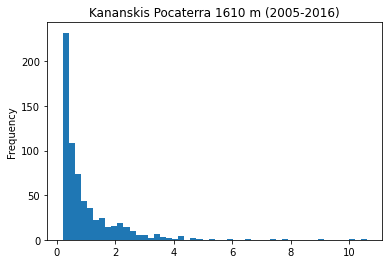

In [48]:
KPP_df.KP_pscaled_mm.plot(kind='hist', bins=50)
plt.title('Kananskis Pocaterra 1610 m (2005-2016)')

gamma: (0.3989430517909671, 0.18899999999999997, 1.6656924852610642)
exponential: (0.189, 0.8110091883614086)


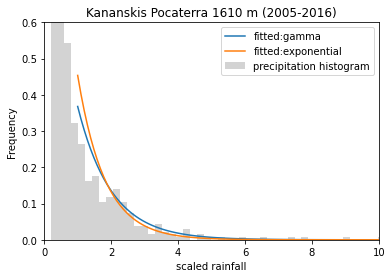

In [122]:
# fit distributions
x = np.linspace(1, max(KPP_df.KP_pscaled_mm), 100)
y = KPP_df.KP_pscaled_mm
KPP_df.KP_pscaled_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma
param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=1, scale=1) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')
# fit exp
param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')
# plot
plt.xlabel('scaled rainfall')
plt.xlim(0, 10)
plt.ylim(0, 0.6)
plt.legend()
plt.title('Kananskis Pocaterra 1610 m (2005-2016)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_scaled_plots_2005-16\KPscaledprob_1mm.png')

### Hay Meadow 1436 m, 916 wet days, mean wet day P = 6.23 mm

Text(0.5, 1.0, 'Hay Meadow 1436 m (2005-2016)')

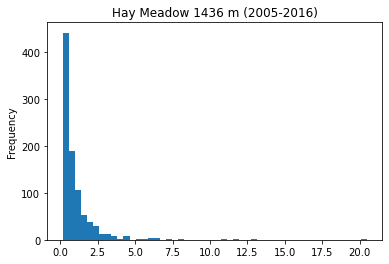

In [65]:
HMP_df.HM_pscaled_mm.plot(kind='hist', bins=50)
plt.title('Hay Meadow 1436 m (2005-2016)')

gamma: (0.17517292241864685, 0.16099999999999998, 1.2041134604751433)
exponential: (0.161, 0.8389890829694323)


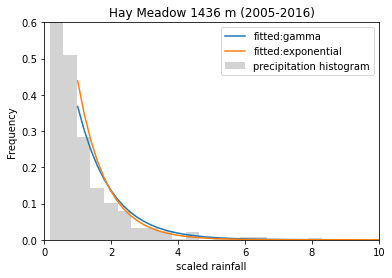

In [123]:
# fit distributions
x = np.linspace(1, max(HMP_df.HM_pscaled_mm), 100)
y = HMP_df.HM_pscaled_mm
HMP_df.HM_pscaled_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma
param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=1, scale=1) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')
# fit exp
param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')
# plot
plt.xlabel('scaled rainfall')
plt.xlim(0, 10)
plt.ylim(0, 0.6)
plt.legend()
plt.title('Hay Meadow 1436 m (2005-2016)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_scaled_plots_2005-16\HMscaledprob_1mm.png')

### Banff CS 1397 m, 980 wet days, mean wet day P = 4.55 mm

Text(0.5, 1.0, 'Banff CS 1397 m (2005-2016)')

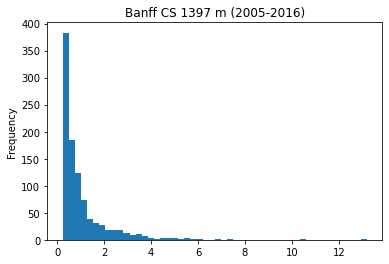

In [93]:
BCSP_df.BCS_pscaled_mm.plot(kind='hist', bins=50)
plt.title('Banff CS 1397 m (2005-2016)')

gamma: (0.4084799109516688, 0.21999999999999997, 1.6441242792882296)
exponential: (0.22, 0.7801112244897959)


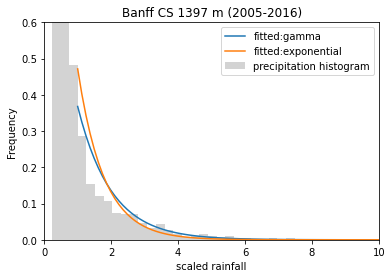

In [124]:
# fit distributions
x = np.linspace(1, max(BCSP_df.BCS_pscaled_mm), 100)
y = BCSP_df.BCS_pscaled_mm
BCSP_df.BCS_pscaled_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma
param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=1, scale=1) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')
# fit exp
param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')
# plot
plt.xlabel('scaled rainfall')
plt.xlim(0, 10)
plt.ylim(0, 0.6)
plt.legend()
plt.title('Banff CS 1397 m (2005-2016)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_scaled_plots_2005-16\BCSscaledprob_1mm.png')

### Kananaskis 1391 m, 1027 wet days, mean wet day P = 7.42 mm

Text(0.5, 1.0, 'Kananaskis 1391 m (2005-2016)')

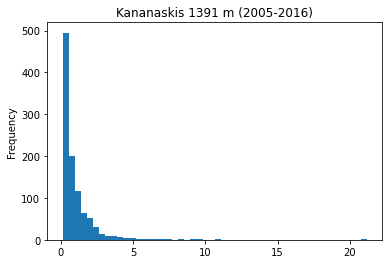

In [103]:
KP_df.K_pscaled_mm.plot(kind='hist', bins=50)
plt.title('Kananaskis 1391 m (2005-2016)')

gamma: (0.16348791669823404, 0.13499999999999998, 1.589965125526216)
exponential: (0.135, 0.8650301850048685)


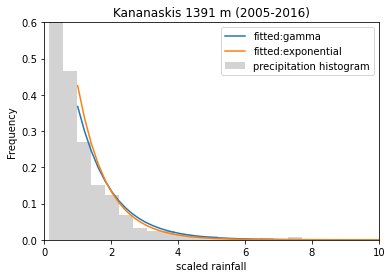

In [125]:
# fit gamma, exp and lognormal distributions
x = np.linspace(1, max(KP_df.K_pscaled_mm), 100)
y = KP_df.K_pscaled_mm
KP_df.K_pscaled_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma
param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=1, scale=1) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')
# fit exp
param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')
# plot
plt.xlabel('scaled rainfall')
plt.xlim(0, 10)
plt.ylim(0, 0.6)
plt.legend()
plt.title('Kananaskis 1391 m (2005-2016)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_scaled_plots_2005-16\Kscaledprob_1mm.png')

### Bow Valley 1298 m, 947 wet days, mean wet day P = 5.97 mm

Text(0.5, 1.0, 'Bow Valley 1298 m (2005-2016)')

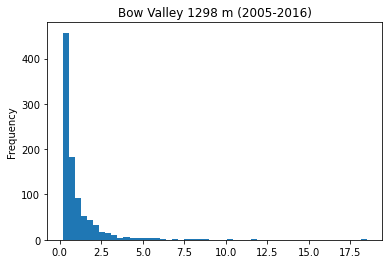

In [109]:
BVP_df.BV_pscaled_mm.plot(kind='hist', bins=50)
plt.title('Bow Valley 1298 m (2005-2016)')

gamma: (0.21961133770330588, 0.16699999999999998, 1.5712160246276579)
exponential: (0.167, 0.832986272439282)


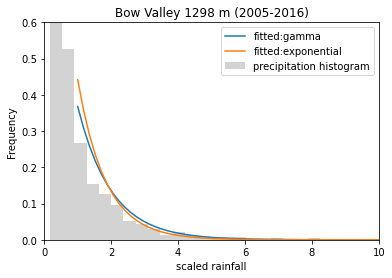

In [126]:
# fit distributions
x = np.linspace(1, max(BVP_df.BV_pscaled_mm), 100)
y = BVP_df.BV_pscaled_mm
BVP_df.BV_pscaled_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma
param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=1, scale=1) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')
# fit exp
param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')
# plot
plt.xlabel('scaled rainfall')
plt.xlim(0, 10)
plt.ylim(0, 0.6)
plt.legend()
plt.title('Bow Valley 1298 m (2005-2016)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_scaled_plots_2005-16\BVscaledprob_1mm.png')

### Wildcat Hills 1268 m, 919 wet days, mean wet day P = 5.76 mm

Text(0.5, 1.0, 'Wildcat Hills 1268 m (2005-2016)')

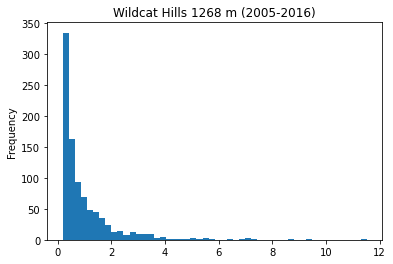

In [118]:
WHP_df.WH_pscaled_mm.plot(kind='hist', bins=50)
plt.title('Wildcat Hills 1268 m (2005-2016)')

gamma: (0.478348029703612, 0.17399999999999996, 1.654904451997107)
exponential: (0.174, 0.8260087051142548)


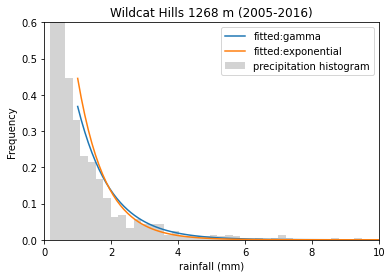

In [127]:
# fit gamma, exp and lognormal distributions
x = np.linspace(1, max(WHP_df.WH_pscaled_mm), 100)
y = WHP_df.WH_pscaled_mm
WHP_df.WH_pscaled_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma
param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=1, scale=1) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')
# fit exp
param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')
# plot
plt.xlabel('rainfall (mm)')
plt.xlim(0, 10)
plt.ylim(0, 0.6)
plt.legend()
plt.title('Wildcat Hills 1268 m (2005-2016)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_scaled_plots_2005-16\WHscaledprob_1mm.png')